[nltk_data] Downloading package stopwords to C:\Users\Sai sharmi
[nltk_data]     Gade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

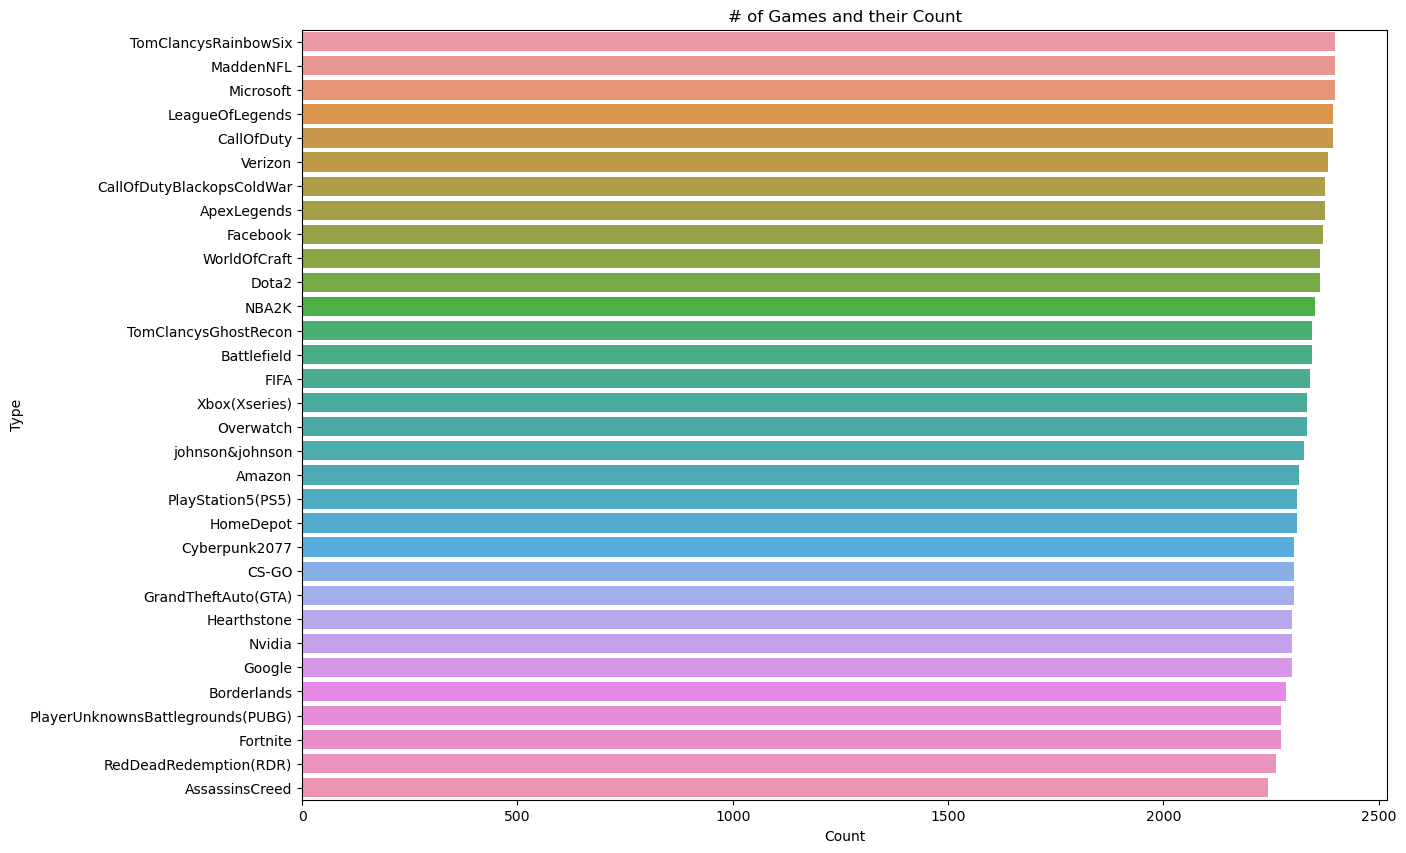

Total records = 73995
           Total Missing  In Percent
id                     0         0.0
game                   0         0.0
sentiment              0         0.0
text                   0         0.0


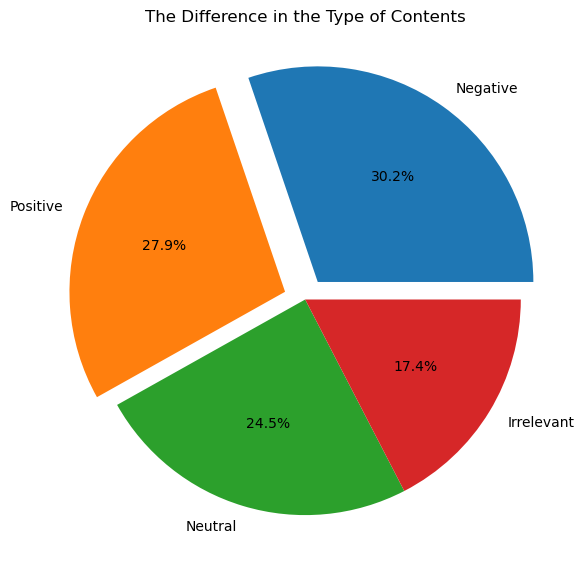

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')

# Load datasets
data = pd.read_csv(r"C:\Users\Sai sharmi Gade\Downloads\twitter_training.csv\twitter_training.csv")
v_data = pd.read_csv(r"C:\Users\Sai sharmi Gade\Downloads\twitter_validation.csv")

# Display first few rows of the datasets
print(data.head())
print(v_data.head())

# Rename columns for clarity
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

# Display datasets with new column names
print(data.head())
print(v_data.head())

# Plot the count of each game type
game_types = data['game'].value_counts()

plt.figure(figsize=(14,10))
sns.barplot(x=game_types.values, y=game_types.index)
plt.title('# of Games and their Count')
plt.ylabel('Type')
plt.xlabel('Count')
plt.show()

# Drop rows with missing text
data.dropna(subset=['text'], inplace=True)

# Check for missing data
total_null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
print("Total records =", data.shape[0])
missing_data = pd.concat([total_null, percent.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
print(missing_data.head(10))

# Separate data by sentiment
train_negative = data[data['sentiment'] == "Negative"]
train_positive = data[data['sentiment'] == "Positive"]
train_irrelevant = data[data['sentiment'] == "Irrelevant"]
train_neutral = data[data['sentiment'] == "Neutral"]

# Plot the distribution of sentiment types
sentiment_types = data['sentiment'].value_counts()

plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1, 0, 0])
plt.title('The Difference in the Type of Contents')
plt.show()
